# Loading the Data

In [170]:
# Data Packages
import pandas as pd 

In [171]:
# Establishing Path and Extension
import os
path = r"C:\Users\zacha\龙京\python\youtube\kg_data\pandas_data\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
extension = '.csv'

In [172]:
# Constructing List of CSV Files
files = [file for file in os.listdir(path) if file.endswith(extension)]

In [173]:
# Importing CSV Files to Pandas 
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)

In [174]:
# Concatening into One 
df = pd.concat(dfs, ignore_index=True)

In [175]:
# Upload Merged CSV
df.to_csv("Sales_FY_2019.csv", index = False)

# Cleaning the Data

In [178]:
# Creating 'Month' Column
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [179]:
# Disply NaN Values
df_nan = df[df.isna().any(axis = 1)]
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# Remove NaN Values
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [176]:
# Find 'Or' 
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [177]:
# Delete 'Or'
df = df[df['Order Date'].str[0:2] != 'Or']

In [181]:
# Convert Data Types 
df['Month'] = df['Month'].astype('int32')

In [182]:
# Convert Data Types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

## Question 1: Best Month for Sales

In [183]:
# Creating 'Sales' Column 
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [184]:
# Groupby 'Month'
month_sales = df.groupby('Month').sum()
month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [185]:
# Arrange in DESC
month_sales.sort_values('Sales', ascending = False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


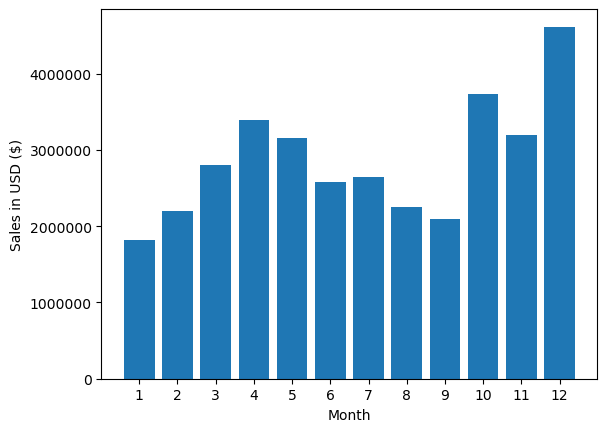

In [133]:
# 'month_sales' Visual
import matplotlib.pyplot as plt

months = range(1, 13)
               
plt.bar(months, month_sales['Sales'])

plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')

# Remove Scientific Notation 
plt.ticklabel_format(style = 'plain')

plt.show()

## Question 2: What city had highest sales?

In [186]:
# Create 'City' Column 
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [187]:
# Adding State to 'City' Column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# F String
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [188]:
# Groupby 'City'
city_sales = df.groupby('City').sum()
city_sales.sort_values('Sales', ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


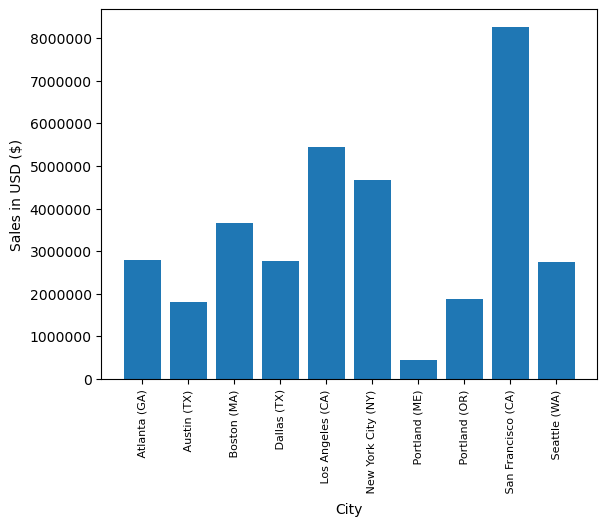

In [189]:
# 'city_sales' Visual 
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]
             
plt.bar(cities, city_sales['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')

# Remove Scientific Notation 
plt.ticklabel_format(style = 'plain', axis = 'y')

plt.show()

## Question 3: Best time to advertise for customer purchases?

In [195]:
# Convert Data Type
df['Order Date'] = pd.to_datetime(df['Order Date'])  
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [197]:
# Create Micro-Time Columns
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [198]:
# 'hours' Groupby
hours = [hour for hour, df in df.groupby('Hour')]
hour_group = df.groupby(['Hour']).count()
hour_group.sort_values('Quantity Ordered', ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921


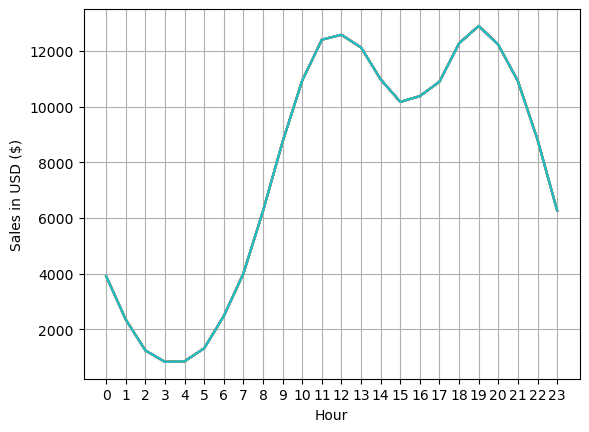

In [199]:
# 'hours' Visual
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)

plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')

plt.grid()
plt.show()

## Question 4: What products are often sold together? 

In [202]:
# Display Duplicates
df = df[df['Order ID'].duplicated(keep = False)]

# Pair Groupby with Column Value
df['Paired'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Paired
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [203]:
# Drop Duplicate Pairs
df_paired = df[['Order ID', 'Paired']].drop_duplicates()
df_paired.head()

,Order ID,Paired
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [204]:
# "Paired' Counter
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Paired']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common():
    print(key, value)

('iPhone', ' Lightning Charging Cable') 2140
('Google Phone', ' USB-C Charging Cable') 2116
('iPhone', ' Wired Headphones') 987
('Google Phone', ' Wired Headphones') 949
('iPhone', ' Apple Airpods Headphones') 799
('Vareebadd Phone', ' USB-C Charging Cable') 773
('Google Phone', ' Bose SoundSport Headphones') 503
(' USB-C Charging Cable', ' Wired Headphones') 372
('Vareebadd Phone', ' Wired Headphones') 327
(' Lightning Charging Cable', ' Wired Headphones') 193
('Vareebadd Phone', ' Bose SoundSport Headphones') 182
(' USB-C Charging Cable', ' Bose SoundSport Headphones') 159
(' Lightning Charging Cable', ' Apple Airpods Headphones') 146
('Lightning Charging Cable', ' USB-C Charging Cable') 110
('Lightning Charging Cable', ' AA Batteries (4-pack)') 104
('Lightning Charging Cable', ' Lightning Charging Cable') 102
('AA Batteries (4-pack)', ' Lightning Charging Cable') 102
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 100
('AA Batteries (4-pack)', ' AAA Batteries (4-pack)') 96
('AAA

## Question 5: What products sold the most and why?

In [210]:
# 'products' Groupby
products = df.groupby('Product')
quantity_ordered = products.sum()['Quantity Ordered']
quantity_ordered.sort_values(ascending = False)

Product
USB-C Charging Cable          2292
Lightning Charging Cable      1949
iPhone                        1867
Wired Headphones              1825
Google Phone                  1642
AAA Batteries (4-pack)        1251
AA Batteries (4-pack)         1013
Apple Airpods Headphones       982
Bose SoundSport Headphones     827
Vareebadd Phone                602
27in FHD Monitor               298
27in 4K Gaming Monitor         251
34in Ultrawide Monitor         247
Macbook Pro Laptop             197
Flatscreen TV                  179
ThinkPad Laptop                176
20in Monitor                   161
LG Washing Machine              28
LG Dryer                        25
Name: Quantity Ordered, dtype: int64

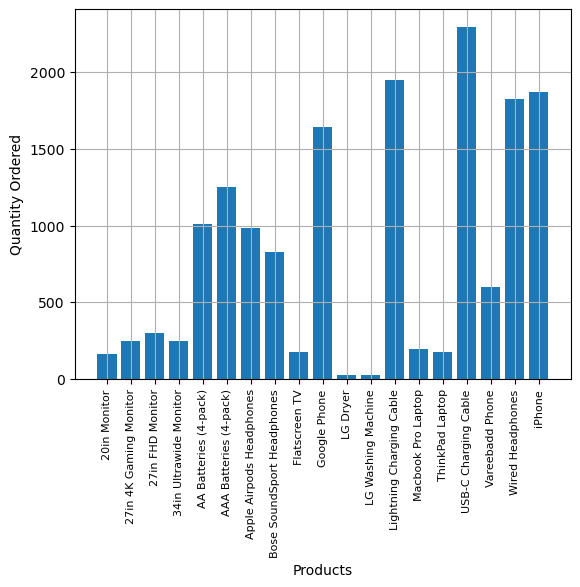

In [211]:
# 'products' Visual
products = [product for product, df in products]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)

plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

plt.show()

In [218]:
# 'prices' Average
prices = df.groupby('Product').mean()['Price Each']
prices_desc = prices.sort_values(ascending = False)
print(prices_desc)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64


C:\Users\zacha\AppData\Local\Temp\ipykernel_17824\1795885900.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


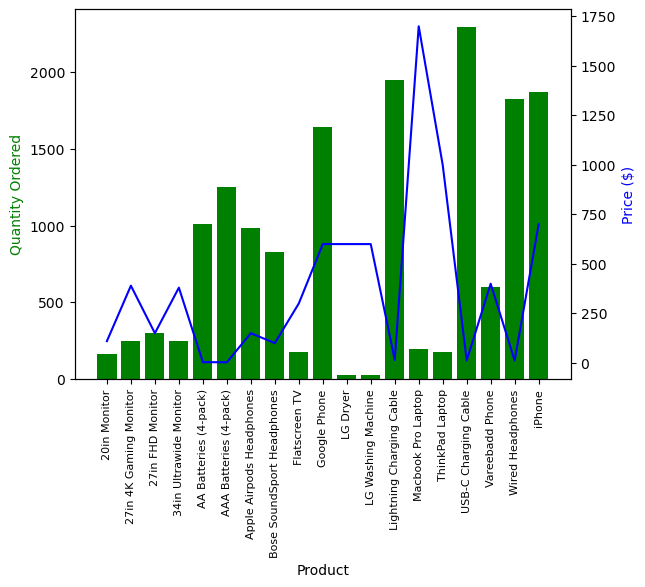

In [224]:
# 'products' and 'prices' Visual
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()